<a href="https://colab.research.google.com/github/deqiangwang123/3253-Machine-Learning/blob/main/Week3_Credit_Card_Demo_Deqiang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

np.random.seed(10086)



#Goal

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
 ***feature importance score? extra feature, feature scaling***
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
  **Straited? use cross_val to check**
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B, **what is appendix B?**
- Study the ROC Curve, decide threshold
- Use 2 classifiers.
    - Random Forest
        - tune only: n_estimators: {3, 4, 6, 7, 10, 20, 50, 100} 
    - KNN Classfier 
        - tune only: n_neighbors: {3, 4, 5, 7, 10, 20, 50} 
    - Which one performs better in the cross validation? **CV=?, grid_search?**
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Cross-validation with 4-folds.

- Other paramenters -> Use default

Notes:
  - Make your code modular, the second part of the assignmet you will have to repeat. 
  - Include documentation for your code 

#Load Data

In [ ]:
# upgrade xlrd version
# pip install --upgrade xlrd

In [3]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", skiprows=1, header=0, index_col=0)
df

LIMIT_BAL  SEX  ...  PAY_AMT6  default payment next month
ID                     ...                                      
1          20000    2  ...         0                           1
2         120000    2  ...      2000                           1
3          90000    2  ...      5000                           0
4          50000    2  ...      1000                           0
5          50000    1  ...       679                           0
...          ...  ...  ...       ...                         ...
29996     220000    1  ...      1000                           0
29997     150000    1  ...         0                           0
29998      30000    1  ...      3100                           1
29999      80000    1  ...      1804                           1
30000      50000    1  ...      1000                           1

[30000 rows x 24 columns]

#Data Exploration

## check missing data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

## is it a balanced dataset?

In [5]:
def check_data_balance(series, style="seaborn-pastel"):
  with plt.style.context(style):
    unique = series.value_counts()
    display(unique)
    plt.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%')

0    23364
1     6636
Name: default payment next month, dtype: int64

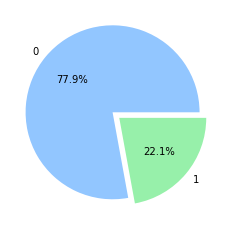

In [6]:
check_data_balance(df["default payment next month"])

##Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff435426a50>,
      dtype=object)

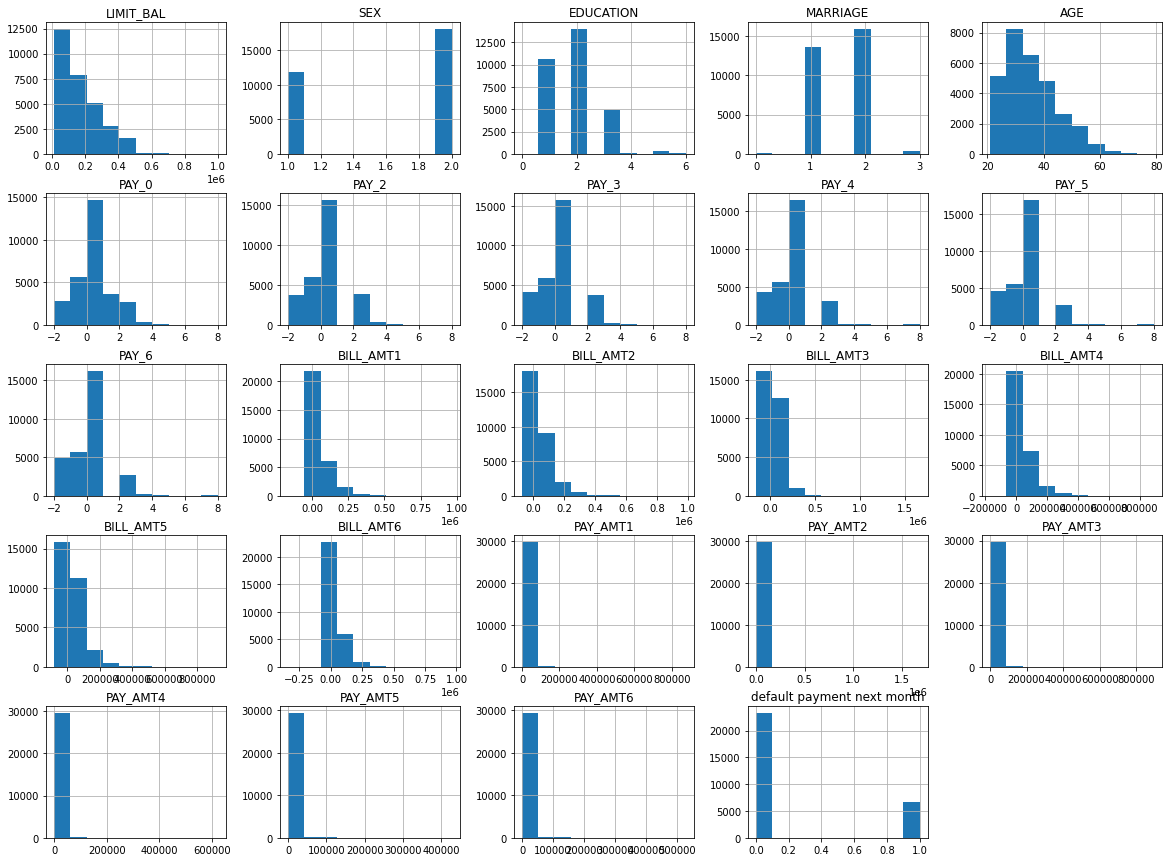

In [7]:
df.hist(figsize=(20,15))

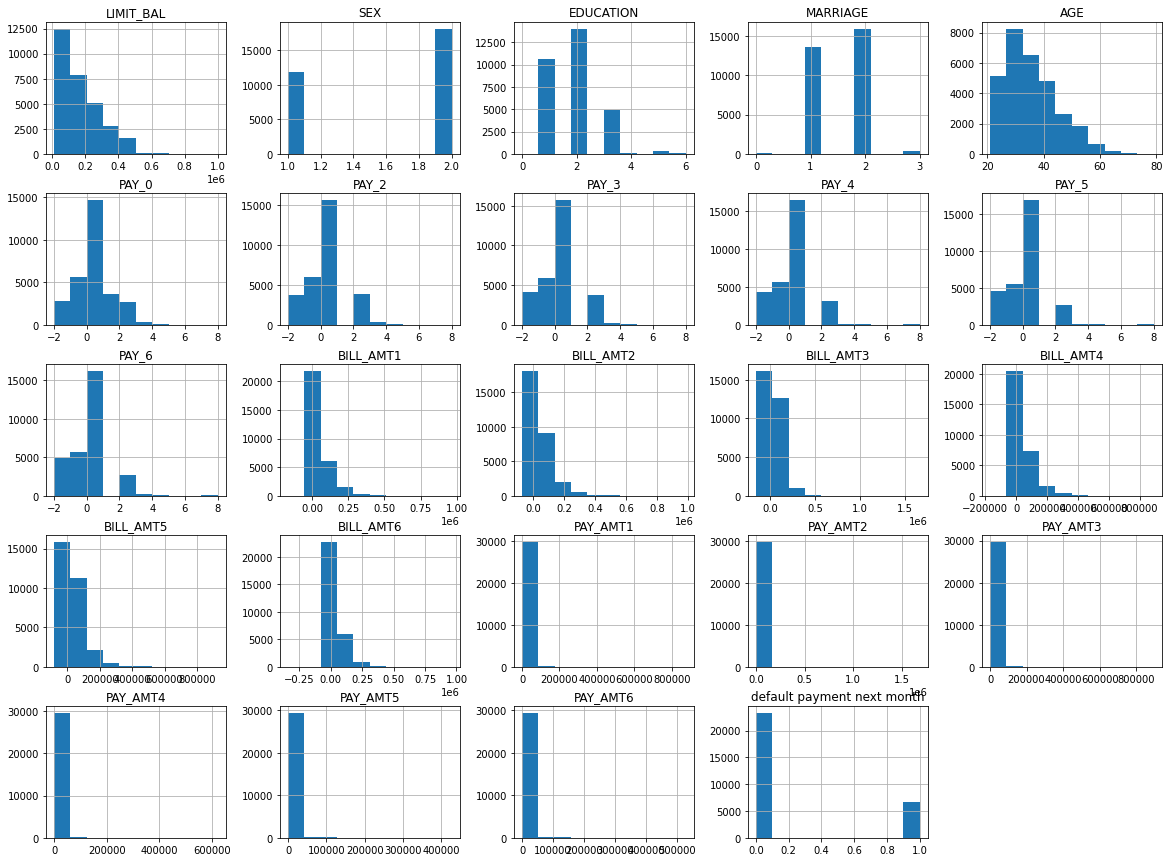

In [8]:
_=df.hist(figsize=(20,15))

##Pair plot

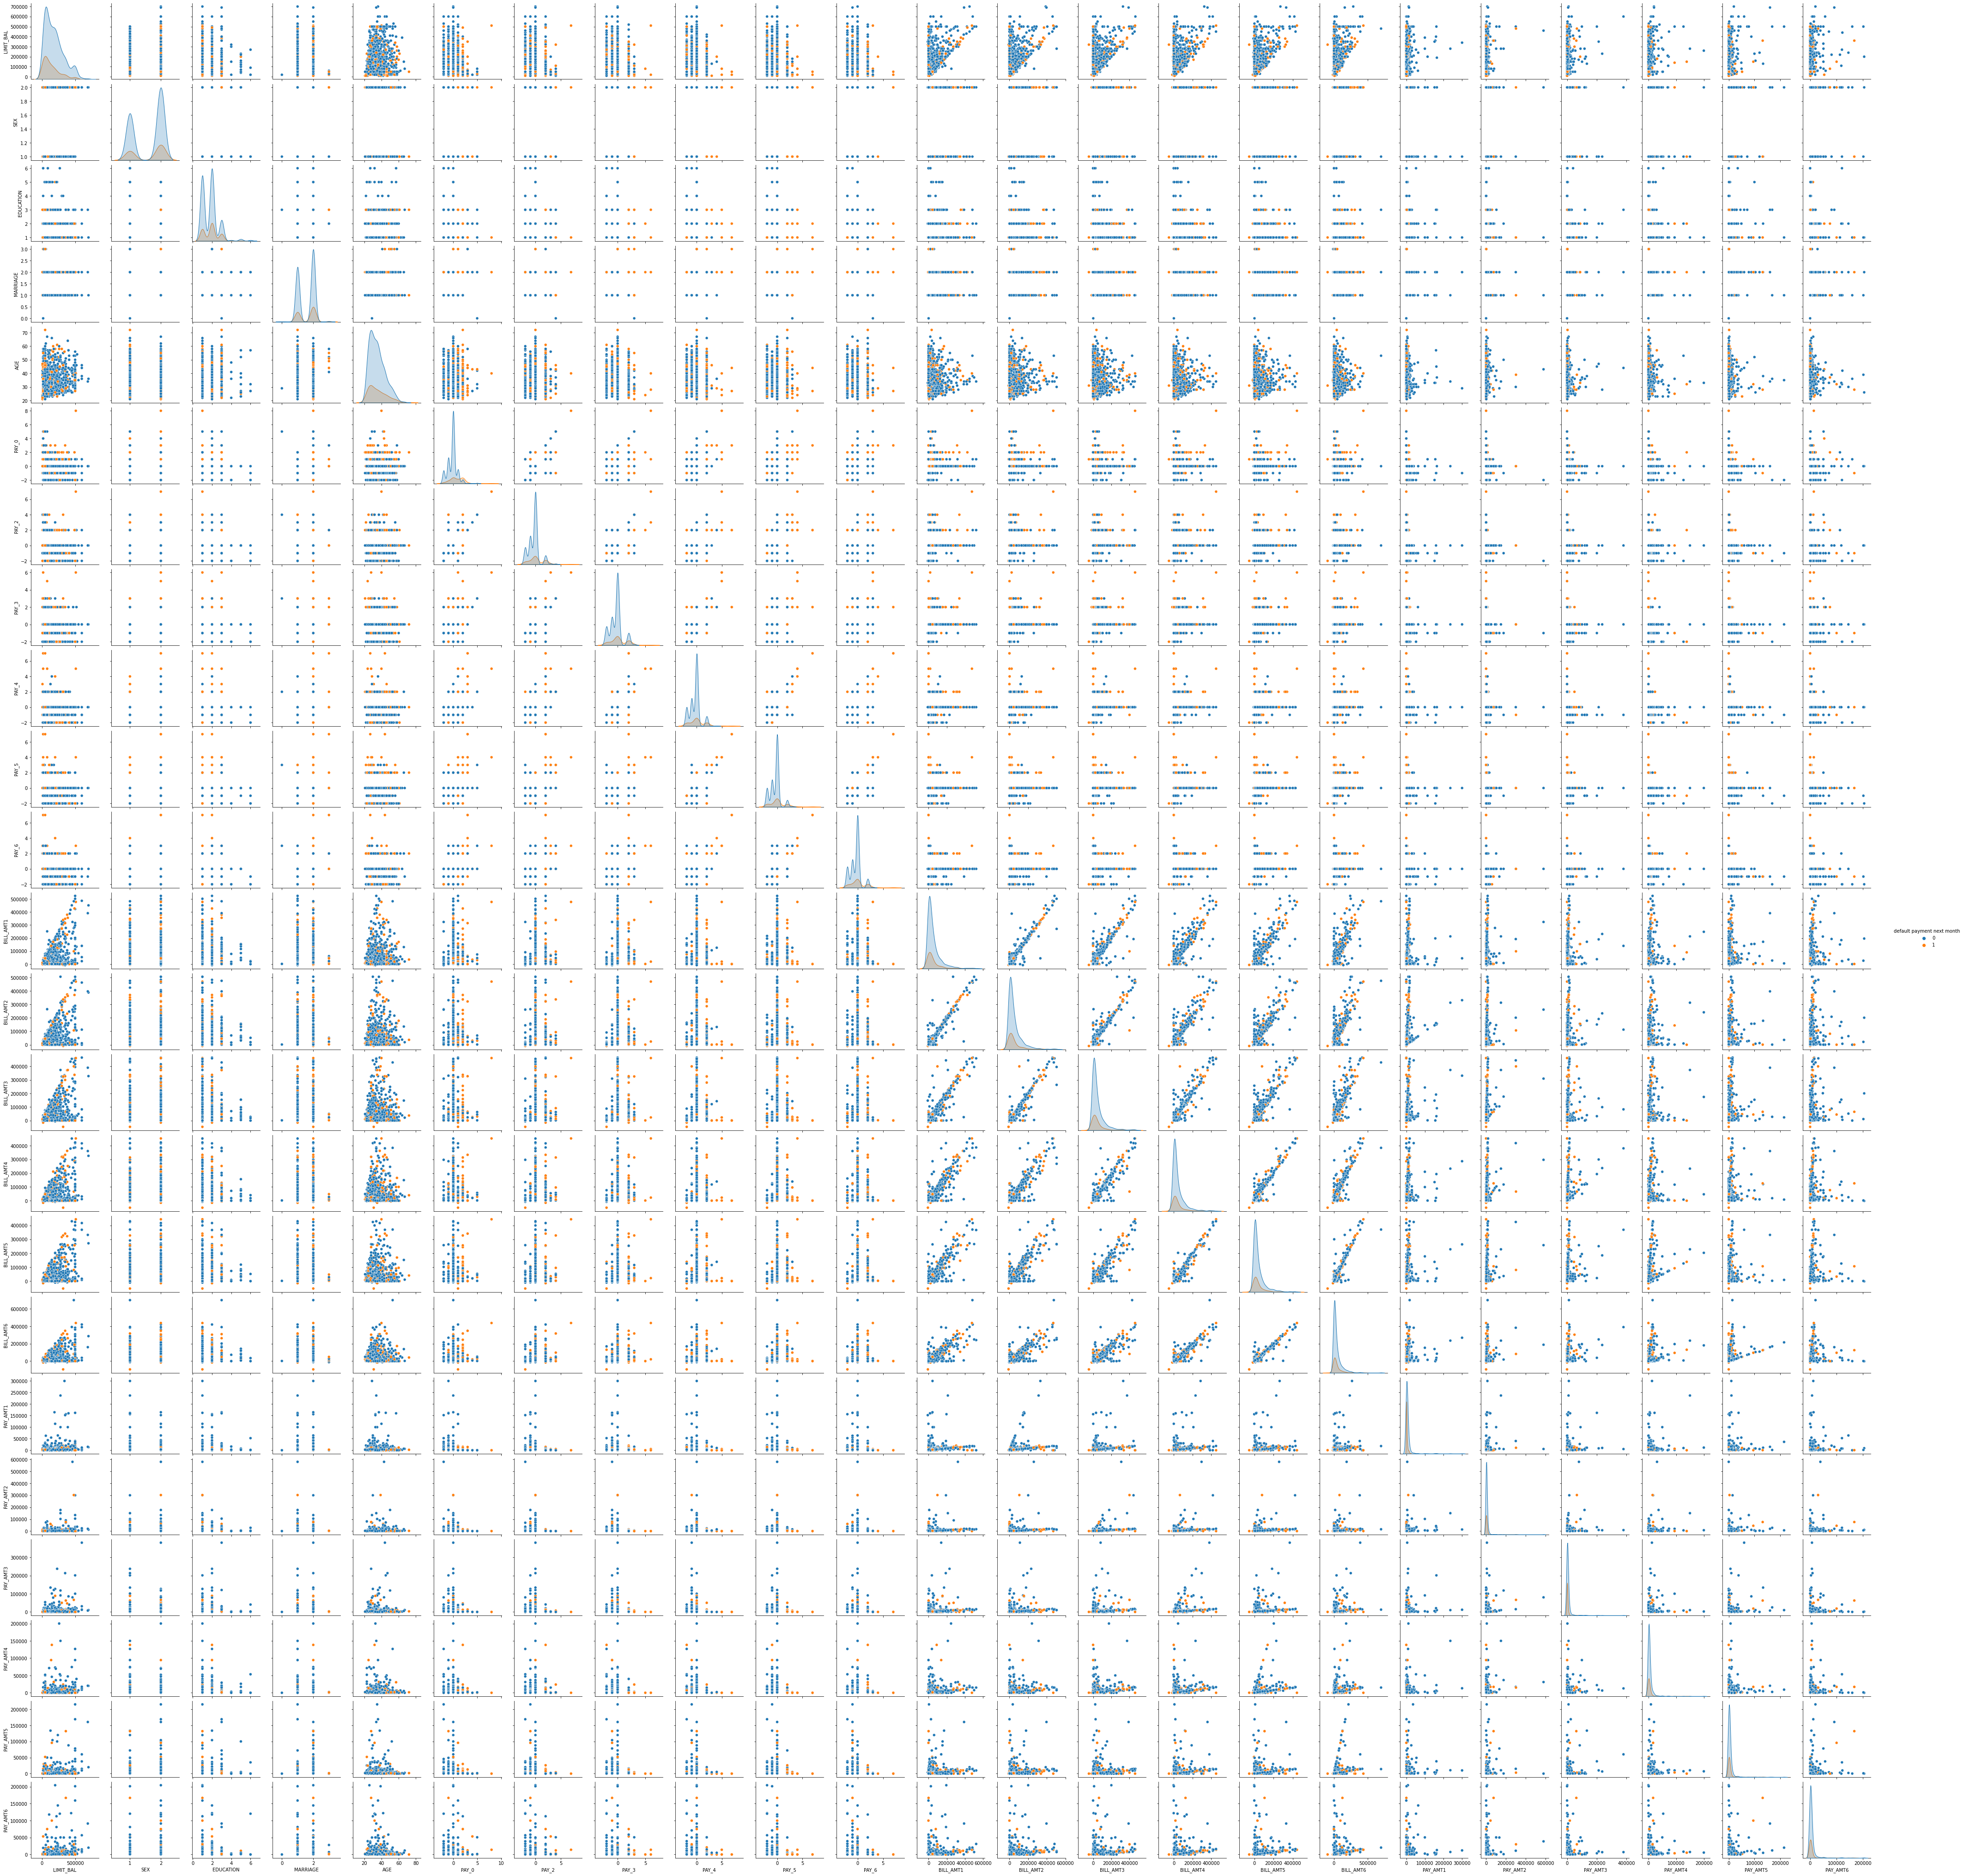

In [9]:
# sns.pairplot(df.sample(1000, random_state=10086), hue="default payment next month")

In [11]:
corr_matrix = df.corr()

In [12]:
corr_matrix

LIMIT_BAL  ...  default payment next month
LIMIT_BAL                    1.000000  ...                   -0.153520
SEX                          0.024755  ...                   -0.039961
EDUCATION                   -0.219161  ...                    0.028006
MARRIAGE                    -0.108139  ...                   -0.024339
AGE                          0.144713  ...                    0.013890
PAY_0                       -0.271214  ...                    0.324794
PAY_2                       -0.296382  ...                    0.263551
PAY_3                       -0.286123  ...                    0.235253
PAY_4                       -0.267460  ...                    0.216614
PAY_5                       -0.249411  ...                    0.204149
PAY_6                       -0.235195  ...                    0.186866
BILL_AMT1                    0.285430  ...                   -0.019644
BILL_AMT2                    0.278314  ...                   -0.014193
BILL_AMT3                    0.283236  ...                   -0.014076
BILL_AMT4                    0.293988  ...                   -0.010156
BILL_AMT5                    0.295562  ...                   -0.006760
BILL_AMT6                    0.290389  ...                   -0.005372
PAY_AMT1                     0.195236  ...                   -0.072929
PAY_AMT2                     0.178408  ...                   -0.058579
PAY_AMT3                     0.210167  ...                   -0.056250
PAY_AMT4                     0.203242  ...                   -0.056827
PAY_AMT5                     0.217202  ...                   -0.055124
PAY_AMT6                     0.219595  ...                   -0.053183
default payment next month  -0.153520  ...                    1.000000

[24 rows x 24 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff41b339190>,
      dtype=object)

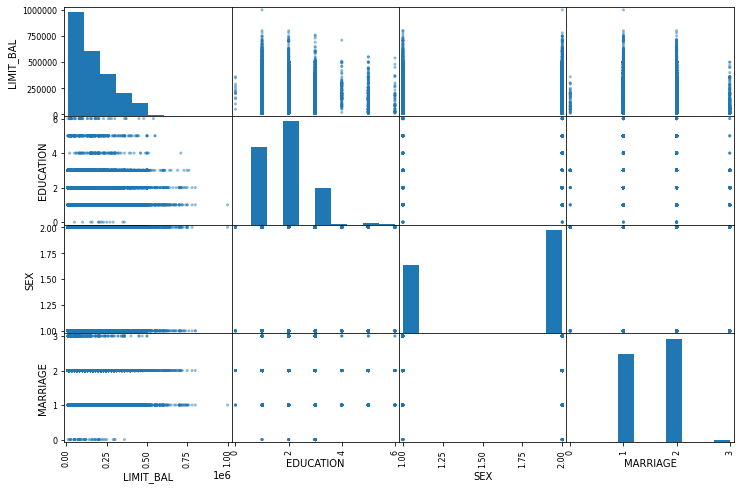

In [13]:
from pandas.plotting import scatter_matrix
attributes = ["LIMIT_BAL", "EDUCATION", "SEX", "MARRIAGE"]
scatter_matrix(df[attributes], figsize=(12,8))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

#Machine Learning

##Choose X and y

In [21]:
TARGET = "default payment next month"
columns_predictors = [col for col in df.columns if col not in [TARGET]]
columns_categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]

# add f in the front to print variable with {}
print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical: {columns_categorical}")
print(f"columns_numerical: {columns_numerical}")

TARGET: default payment next month
columns_predictors: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
columns_categorical: ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
columns_numerical: ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [17]:
type(columns_predictors)

list

In [24]:
X = df[columns_predictors]
y = df[TARGET]
display(X)
display(y)

LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6
ID                                ...                              
1          20000    2          2  ...         0         0         0
2         120000    2          2  ...      1000         0      2000
3          90000    2          2  ...      1000      1000      5000
4          50000    2          2  ...      1100      1069      1000
5          50000    1          2  ...      9000       689       679
...          ...  ...        ...  ...       ...       ...       ...
29996     220000    1          3  ...      3047      5000      1000
29997     150000    1          3  ...       129         0         0
29998      30000    1          2  ...      4200      2000      3100
29999      80000    1          3  ...      1926     52964      1804
30000      50000    1          2  ...      1000      1000      1000

[30000 rows x 23 columns]

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default payment next month, Length: 30000, dtype: int64

In [23]:
type(X)

pandas.core.frame.DataFrame

## Train-test split

In [26]:
df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10086, stratify=y)
# stratified based on y, so train_test_split can do stratified sampling 
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (22500, 23)
X_test.shape: (7500, 23)
y_train.shape: (22500,)
y_test.shape: (7500,)


0    17523
1     4977
Name: default payment next month, dtype: int64

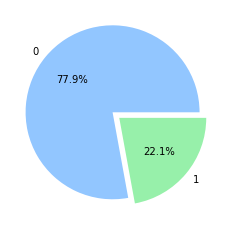

In [30]:
check_data_balance(y_train)

0    5841
1    1659
Name: default payment next month, dtype: int64

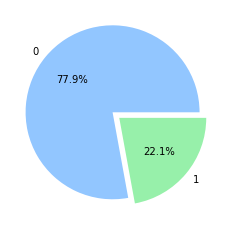

In [31]:
check_data_balance(y_test)

##Preprocessing with pipelines

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder()),
])

pipeline_numerical = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0,1))),
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical),
  ("numerical", pipeline_numerical, columns_numerical),
])

In [34]:
X_train[columns_categorical]

SEX  EDUCATION  MARRIAGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
ID                                                                       
17778    2          3         2      0      0      0      0      0      0
11181    2          2         1      2      0      0      0      0      0
18834    2          2         2      0      0      0      0      0      0
19424    2          1         2      0      0      0     -1      0      0
15760    2          2         2      2      2      2      2      0      0
...    ...        ...       ...    ...    ...    ...    ...    ...    ...
14526    1          2         2      0      0      0      0      0      0
21159    1          2         2      0      0      0      0      0      0
15009    1          3         1      1      3      2      2      2      2
26564    2          3         2      0      0      0      0      0      0
21191    1          2         2      0      0      0      0      0      0

[22500 rows x 9 columns]

In [36]:
X_train[columns_numerical].describe()

LIMIT_BAL           AGE  ...       PAY_AMT5       PAY_AMT6
count   22500.000000  22500.000000  ...   22500.000000   22500.000000
mean   166970.652444     35.485200  ...    4735.715556    5228.689200
std    129578.788447      9.227763  ...   15235.910006   17812.352082
min     10000.000000     21.000000  ...       0.000000       0.000000
25%     50000.000000     28.000000  ...     277.000000     142.000000
50%    140000.000000     34.000000  ...    1500.000000    1500.000000
75%    240000.000000     41.000000  ...    4008.250000    4000.000000
max    800000.000000     75.000000  ...  426529.000000  527143.000000

[8 rows x 14 columns]

In [37]:
pipeline_numerical.fit_transform(X_train[columns_numerical])

array([[7.59493671e-02, 6.29629630e-01, 1.86590442e-01, ...,
        6.55394525e-04, 7.03351941e-04, 5.69105537e-04],
       [2.27848101e-01, 4.44444444e-01, 3.35281688e-01, ...,
        5.95813205e-03, 8.80127729e-03, 1.49864458e-02],
       [7.59493671e-02, 5.55555556e-02, 2.18963518e-01, ...,
        2.41545894e-03, 3.51675970e-03, 0.00000000e+00],
       ...,
       [2.53164557e-02, 4.07407407e-01, 2.06132438e-01, ...,
        0.00000000e+00, 4.75700363e-03, 1.94823795e-03],
       [5.06329114e-02, 6.48148148e-01, 2.34257349e-01, ...,
        9.66183575e-04, 2.38436308e-03, 3.92644880e-02],
       [4.30379747e-01, 2.77777778e-01, 1.97985739e-01, ...,
        5.05636071e-04, 2.34450647e-02, 1.32791292e-02]])

In [52]:
pipeline_categorical.fit_transform(X_train[columns_categorical]).toarray().shape

(22500, 77)

In [44]:
pipeline_full.fit_transform(X_train).toarray()

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.55394525e-04, 7.03351941e-04, 5.69105537e-04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        5.95813205e-03, 8.80127729e-03, 1.49864458e-02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.41545894e-03, 3.51675970e-03, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.75700363e-03, 1.94823795e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        9.66183575e-04, 2.38436308e-03, 3.92644880e-02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.05636071e-04, 2.34450647e-02, 1.32791292e-02]])

## Apply the pipeline
**only fit on X_train once, but do the transform to X_train and X_test** to avoid leak information from test dataset to train dataset. For example, Xmax and Xmin in the MinMaxScaler.

In [46]:
pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)

access attributes within pipeline

In [47]:
pipeline_full.named_transformers_["numerical"]

Pipeline(steps=[('scaler', MinMaxScaler())])

In [48]:
pipeline_full.named_transformers_["numerical"].named_steps

{'scaler': MinMaxScaler()}

In [49]:
pipeline_full.named_transformers_["numerical"].named_steps["scaler"].feature_range

(0, 1)

In [50]:
pipeline_full.named_transformers_["categorical"].named_steps

{'onehot': OneHotEncoder()}

In [51]:
pipeline_full.named_transformers_["categorical"].named_steps["onehot"].get_feature_names(columns_categorical) #this is the column names after one-hot encoding

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-2',
       'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1',
       'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7',
       'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3',
       'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-2',
       'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7', 'PAY_6_8'], dtype=

##Train ML mode on transformed training set

In [53]:
%%time
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs=-1, random_state=10086)
model.fit(X_train_transformed, y_train)

CPU times: user 51.6 ms, sys: 138 ms, total: 189 ms
Wall time: 2.74 s


## Evaluate the model on transformed testing set

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_transformed)
y_pred_proba = model.predict_proba(X_test_transformed)

print(f"accuracy_score: {accuracy_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred)}")
print(f"recall_score: {recall_score(y_test, y_pred)}")
print(f"f1_score: {f1_score(y_test, y_pred)}")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_proba[:,1])}")

accuracy_score: 0.8162666666666667
precision_score: 0.6703030303030303
recall_score: 0.3333333333333333
f1_score: 0.44524959742351045
roc_auc_score: 0.7630473057420065
